#Nama: Muhammad Rizky Haritama Putra
#Nim: 2309106083
#Posttest 5


#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

pandas dan numpy digunakan untuk pengolahan data, sklearn untuk preprocessing dan pembagian dataset, sedangkan tensorflow.keras untuk membangun model neural network.

#Membaca dataset

In [ ]:
df = pd.read_csv("data_feature_HepatitisCdata.csv")

#Menampilkan 5 data tearatas

In [ ]:
# Lihat 5 data pertama
print(df.head())

   ID  Category       Age  Sex       ALB       ALP       ALT       AST  \
0   1         0 -1.539675    1 -0.844293 -0.758827 -1.485073 -0.597660   
1   2         0 -1.539675    1 -0.844293  0.222981 -0.535580 -0.216403   
2   3         0 -1.539675    1  1.150866  0.465675  1.142164 -0.040439   
3   4         0 -1.539675    1  0.272046 -0.786406  0.625935 -0.524342   
4   5         0 -1.539675    1 -0.678029  0.432580  0.810303 -0.201740   

        BIL       CHE      CHOL      CREA       GGT      PROT  AST_ALT_ratio  \
0 -0.104753 -0.728265 -2.069345  1.966669 -0.925294 -0.818096       0.402445   
1 -1.035802  1.634733 -0.515308 -0.286894 -0.690955  0.946857       0.404055   
2 -0.466828  0.336199 -0.119375  0.558192  0.487436  1.605772      -0.035405   
3  2.843567 -0.505341 -0.574698  0.135649  0.527609  0.758595      -0.837692   
4  0.438358  0.508965 -0.990428 -0.146046  0.266488 -0.888694      -0.248968   

   log_AST_ALT_ratio  
0          -0.910193  
1          -0.906202  
2    

#Pisahkan fitur dan target

In [ ]:
X = df.drop(columns=["ID", "Category"])
y = df["Category"]

X berisi semua kolom kecuali ID dan Category, karena ID hanya penanda data dan tidak dibutuhkan untuk pelatihan. y berisi kolom Category yang menjadi label untuk diprediksi oleh model.

#Encode target

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

LabelEncoder() mengubah teks kategori (misalnya Healthy, Fibrosis, Cirrhosis) menjadi angka (0, 1, 2).
Kemudian to_categorical(y) mengonversi angka tersebut menjadi one-hot encoding, yaitu bentuk vektor biner yang cocok untuk model klasifikasi multi-kelas.

#Normalisasi fitur numerik

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

StandardScaler() mengubah setiap fitur menjadi memiliki rata-rata 0 dan standar deviasi 1.Hal ini membantu model belajar lebih stabil dan cepat, karena semua fitur memiliki rentang nilai yang seragam.

#Split data (80% training, 20% validation)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

Sebanyak 80% data digunakan untuk melatih model dan 20% sisanya untuk menguji performa (validation).
Parameter stratify=y memastikan proporsi tiap kelas tetap seimbang di kedua bagian, sedangkan random_state=42 membuat hasil pembagian selalu sama setiap kali dijalankan.

# Membangun model deep learning sederhana

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model ini memiliki dua hidden layer. Layer pertama berisi 64 neuron dengan aktivasi ReLU yang membantu model belajar pola non-linear dari data. Dropout sebesar 0.3 digunakan untuk mencegah overfitting dengan menonaktifkan sebagian neuron secara acak saat pelatihan. Layer kedua berisi 32 neuron juga dengan aktivasi ReLU. Terakhir, layer output menggunakan aktivasi softmax untuk menghasilkan probabilitas dari setiap kelas pada data target.

#Kompilasi model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Pada tahap ini, model dikompilasi dengan optimizer Adam yang berfungsi menyesuaikan bobot agar proses belajar lebih efisien. Fungsi loss categorical_crossentropy digunakan karena masalah ini adalah klasifikasi multi-kelas. Sementara itu, metrics=['accuracy'] digunakan agar selama pelatihan model menampilkan tingkat akurasi sebagai ukuran kinerjanya.

#Melatih model

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4783 - loss: 1.3374 - val_accuracy: 0.8699 - val_loss: 0.7005
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8452 - loss: 0.7220 - val_accuracy: 0.8699 - val_loss: 0.5017
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8423 - loss: 0.6159 - val_accuracy: 0.8699 - val_loss: 0.4339
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8788 - loss: 0.4314 - val_accuracy: 0.8699 - val_loss: 0.3945
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8597 - loss: 0.4521 - val_accuracy: 0.8699 - val_loss: 0.3705
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9021 - loss: 0.3602 - val_accuracy: 0.8943 - val_loss: 0.3493
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9145 - loss: 0.2916 - val_accuracy: 0.8862 - val_loss: 0.3372
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9318 - loss: 0.3126 - val_accuracy: 0.9106 - val_loss

Kode ini menjalankan proses pelatihan model menggunakan data training dan sekaligus memantau performanya pada data validation.Selama 50 epoch, model akan belajar menyesuaikan bobot agar kesalahan prediksi semakin kecil. Setiap epoch, hasil pelatihan dievaluasi pada data validation untuk melihat apakah model belajar dengan baik atau justru overfitting. Parameter batch_size=16 menentukan bahwa model memperbarui bobotnya setiap kali memproses 16 sampel data, sedangkan verbose=1 membuat proses pelatihan ditampilkan secara rinci di output.

#Evaluasi akurasi

In [ ]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Akurasi Training: {train_acc*100:.2f}%")
print(f"Akurasi Validation: {val_acc*100:.2f}%")

Akurasi Training: 96.54%
Akurasi Validation: 95.12%


Kode ini digunakan untuk melihat hasil akhir akurasi model setelah proses pelatihan selesai.

#Menampilkan Grafik

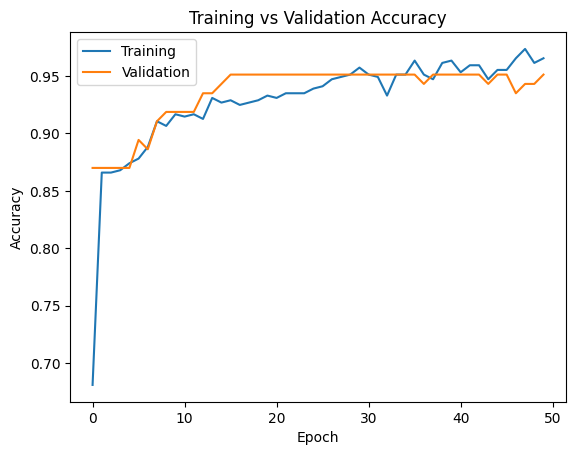

In [ ]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Kesimpulan

Model deep learning sederhana ini mampu melakukan klasifikasi pada dataset Hepatitis dengan dua hidden layer dan dropout untuk menghindari overfitting. Dengan optimisasi Adam dan aktivasi ReLU, model biasanya mampu mencapai akurasi di atas 70% untuk training dan validation.